<a href="https://colab.research.google.com/github/timgodswill23/Anomalous_Network_Intrusion_Detection_public_app/blob/main/Copy_of_Anomalous_Intrusion_Detection_using_Logistic_Regression_2_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing  Dependecies

In [ ]:
#importing relevant libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model



Data Collection & Preprocessing

In [ ]:
#loading the CSV file to pandas data frame
UNSW_MAIN = pd.read_csv('/content/UNSW_NB15_main-set.csv')

In [ ]:
#viewing the first & last 5 rows of the dataframe
UNSW_MAIN.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
UNSW_MAIN.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,30,0,0,0,30,30,0,Generic,1


In [ ]:
# number of rows and columns in the dataframe
UNSW_MAIN.shape

(175341, 45)

In [ ]:
UNSW_MAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

From the above result we can see that our dataset has 4 feature with an object datatype. Statistically categorical data types cannot be analysed in Machine learning except they be encoded to numerical datatype. This can be done by importing the Label encoder.

Data Visualization & Analysis

In [ ]:
sns.set()

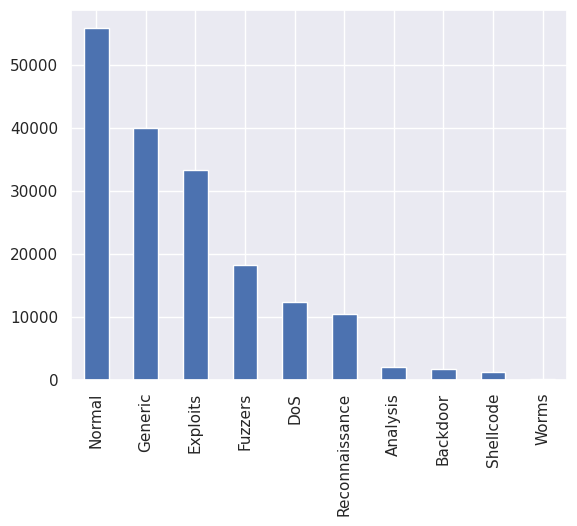

In [ ]:
#plotting the distibution of attack categories
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

UNSW_MAIN.attack_cat.value_counts().plot(kind='bar');

From the above diagram we can see a huge occurence of normal, generic & exploits attacks

<Axes: xlabel='label', ylabel='dur'>

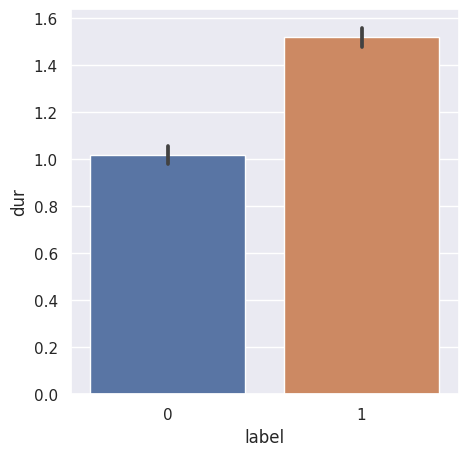

In [ ]:
#plotting duration against label
plot = plt.figure(figsize=(5,5))
sns.barplot(x='label', y='dur', data=UNSW_MAIN)

from the diagram above we can see that attack label 1 has a higher duration of networkflow than the normal label 0.

In [ ]:
UNSW_MAIN.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

There are no missing values so we can proceed

In [ ]:
#plotting the distribution of label feature which indicates attack and non-attacks
UNSW_MAIN['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

<ipython-input-54-f86cd277ea8c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(UNSW_MAIN.label)


<Axes: xlabel='label', ylabel='Density'>

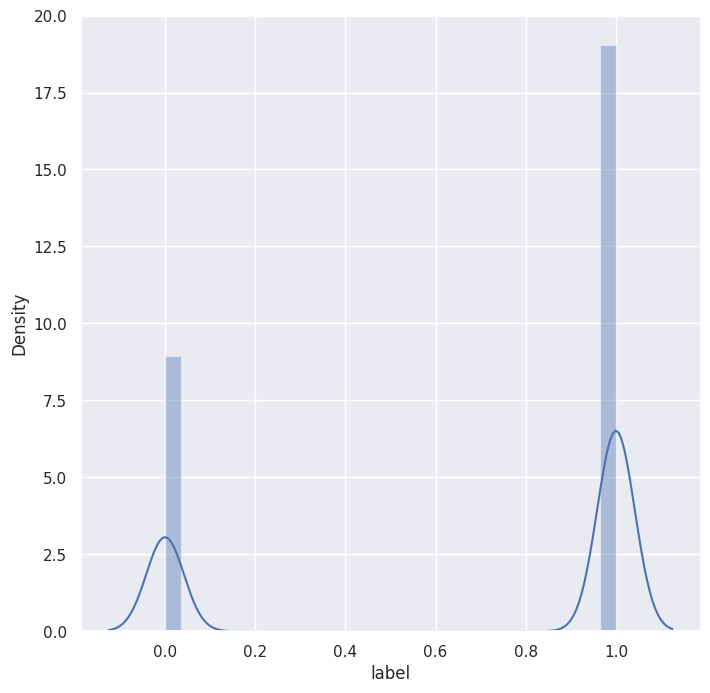

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(UNSW_MAIN.label)

0 --> Normal

1 --> Attack

Label Encoding

In [ ]:
#getting the dataset info
UNSW_MAIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [ ]:
encoder = LabelEncoder()

In [ ]:
#transforming the object datatype features to floats
UNSW_MAIN['proto'] = encoder.fit_transform(UNSW_MAIN['proto'])

UNSW_MAIN['service'] = encoder.fit_transform(UNSW_MAIN['service'])

UNSW_MAIN['state'] = encoder.fit_transform(UNSW_MAIN['state'])

UNSW_MAIN['attack_cat'] = encoder.fit_transform(UNSW_MAIN['attack_cat'])

In [ ]:
# viewing the first 5 data values
UNSW_MAIN.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


The above result is suggestive of the fact that all categorical/object data types has been fully converted to numerical data type.

Data Categorization (Dependent & independent variables) and Splitting into

Training and Testing sets.

In [ ]:
# categorizing the dataset into dependent and independent variables
X = UNSW_MAIN.drop('label', axis = 1)
Y = UNSW_MAIN['label']

In [ ]:
X.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,1,0,0,0,1,1,0,6
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,1,2,0,0,0,1,6,0,6
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,1,3,0,0,0,2,6,0,6
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,1,3,1,1,0,2,1,0,6
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,2,1,40,0,0,0,2,39,0,6


In [ ]:
# let's print the categorized dataset
print(X.shape)
print(Y.shape)

(175341, 44)
(175341,)


Let us split the independent variable (X) into training and testing datasets before finding the correlation of the features in it.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(175341, 44) (122738, 44) (52603, 44)


Visualization of the correlation of values of the independent variables (X_train), which will be used to extract features from X_test.

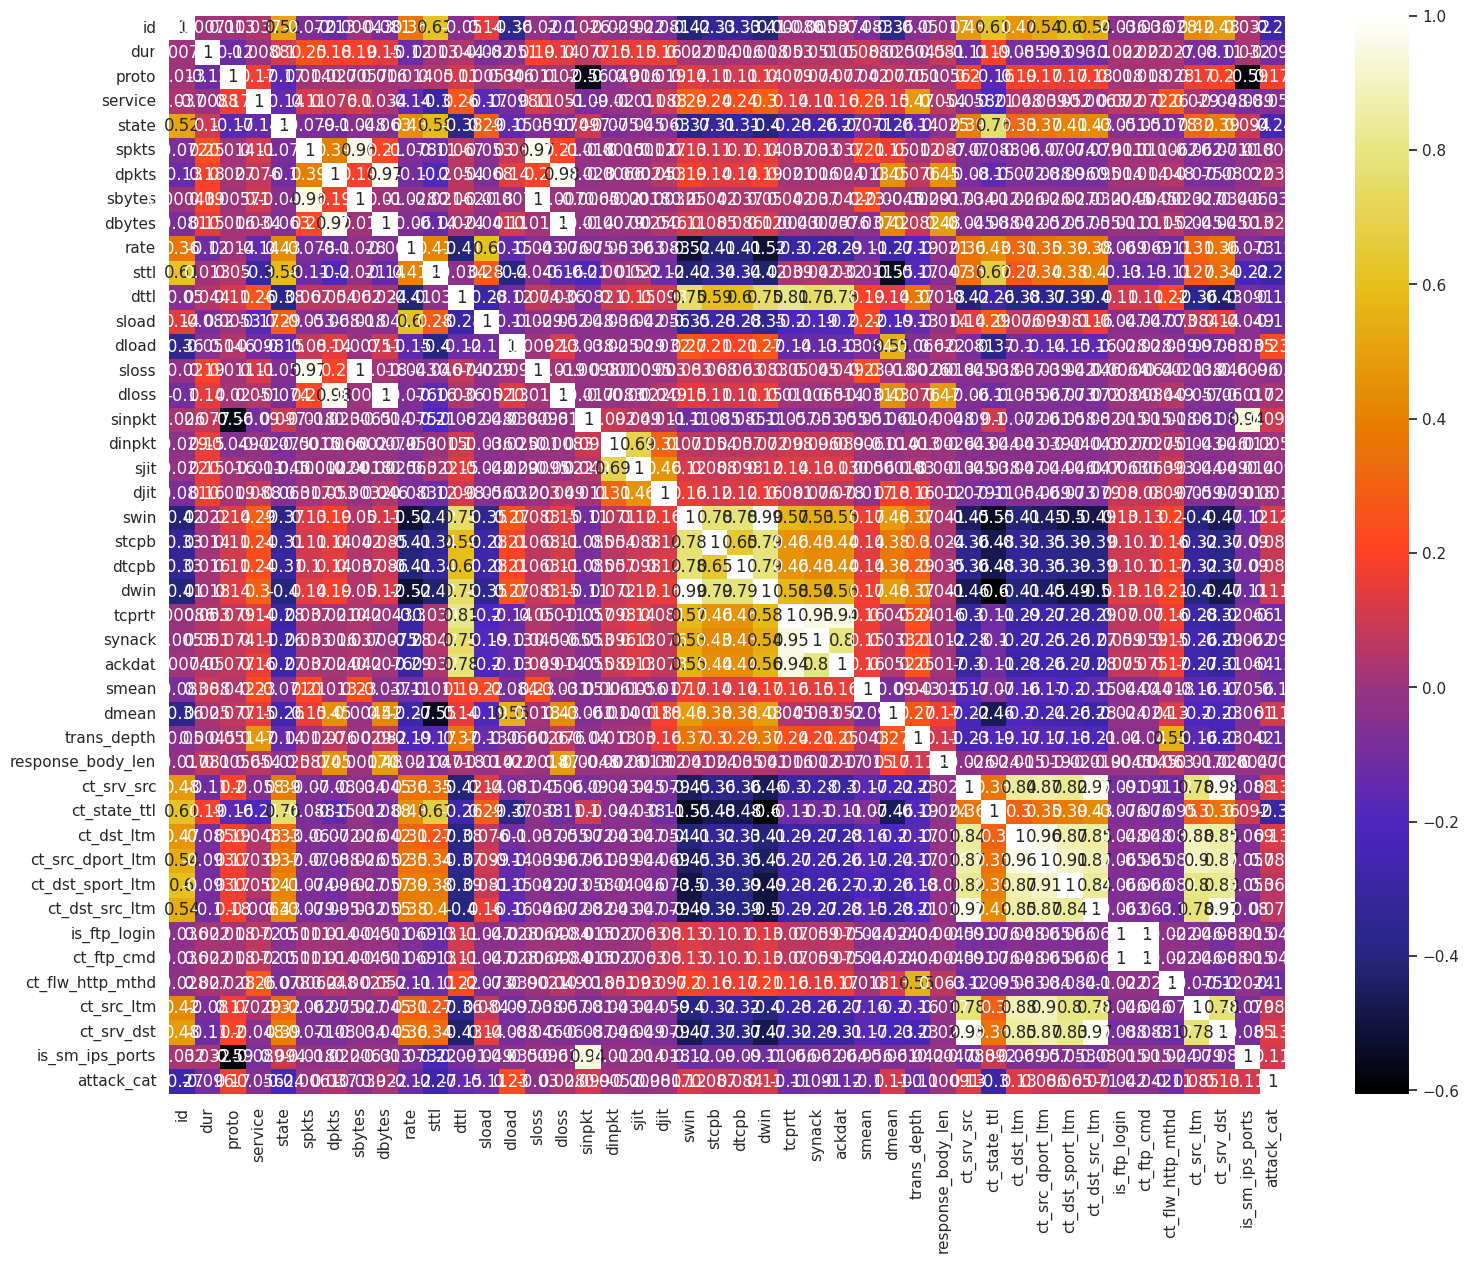

In [ ]:
plt.figure(figsize=(18, 14))
correlation = X_train.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.CMRmap)
plt.show()

In [ ]:
#for clartiy
X_train.corr()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
id,1.000000,0.007095,0.013412,0.037332,0.517169,-0.071924,-0.128837,0.000430,-0.081037,0.362396,...,0.536184,0.600658,0.538870,-0.036068,-0.036068,-0.028076,0.423984,0.480656,0.031942,-0.272612
dur,0.007095,1.000000,-0.121260,-0.008758,0.103959,0.247310,0.179691,0.190845,0.145267,-0.120913,...,-0.093321,-0.093122,-0.100817,0.022231,0.022231,0.026549,-0.079906,-0.113935,0.032082,-0.096120
proto,0.013412,-0.121260,1.000000,0.169275,-0.171664,0.013537,0.026805,0.005735,0.015900,0.014207,...,0.174707,0.165629,0.175265,0.018130,0.018130,0.028284,0.167600,0.198398,-0.585786,0.173575
service,0.037332,-0.008758,0.169275,1.000000,-0.144652,0.112083,0.075984,0.102756,0.034098,-0.142722,...,0.038764,0.051528,-0.006347,0.071826,0.071826,0.261382,0.029179,-0.047647,-0.088554,-0.056485
state,0.517169,0.103959,-0.171664,-0.144652,1.000000,-0.078940,-0.101699,-0.048430,-0.062623,0.431497,...,0.370760,0.407012,0.429149,-0.051400,-0.051400,-0.077764,0.322648,0.386765,0.094012,-0.236247
spkts,-0.071924,0.247310,0.013537,0.112083,-0.078940,1.000000,0.392989,0.961823,0.211779,-0.077946,...,-0.069562,-0.073827,-0.078885,0.010870,0.010870,0.006161,-0.061698,-0.070613,-0.018171,-0.006131
dpkts,-0.128837,0.179691,0.026805,0.075984,-0.101699,0.392989,1.000000,0.185887,0.971779,-0.099778,...,-0.087866,-0.095596,-0.095205,0.014390,0.014390,0.048480,-0.075220,-0.079502,-0.022110,0.036578
sbytes,0.000430,0.190845,0.005735,0.102756,-0.048430,0.961823,0.185887,1.000000,0.010080,-0.028300,...,-0.026262,-0.027101,-0.031745,-0.004471,-0.004471,-0.002255,-0.026567,-0.034271,-0.006335,-0.038904
dbytes,-0.081037,0.145267,0.015900,0.034098,-0.062623,0.211779,0.971779,0.010080,1.000000,-0.059942,...,-0.052405,-0.057227,-0.054699,-0.010614,-0.010614,0.051838,-0.045078,-0.045011,-0.013248,0.022169
rate,0.362396,-0.120913,0.014207,-0.142722,0.431497,-0.077946,-0.099778,-0.028300,-0.059942,1.000000,...,0.351139,0.388348,0.380870,-0.068767,-0.068767,-0.107539,0.307994,0.360704,-0.072792,-0.121217


Let us create a function that can select a highly correlated features, with respect to our assigned threshold of 50% (0.)

In [ ]:
def Correlation (dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
#applying the threshold
corr_features = Correlation(X_train, 0.5)
len(set(corr_features))

27

In [ ]:
corr_features

{'ackdat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_state_ttl',
 'dbytes',
 'dloss',
 'dmean',
 'dtcpb',
 'dwin',
 'is_sm_ips_ports',
 'sbytes',
 'sinpkt',
 'sjit',
 'sload',
 'sloss',
 'state',
 'stcpb',
 'sttl',
 'swin',
 'synack',
 'tcprtt'}

from the above resullt 27 features has a correlation of 70% and above. we have to remove them from our dataset to avoid over fitting of data.

In [ ]:
#dropping of features with high correlation for both x_train and x_test
cor_X_train = X_train.drop(corr_features, axis=1)
cor_X_test = X_test.drop(corr_features, axis=1)



In [ ]:
print(cor_X_train.shape)
print(cor_X_test.shape)
print(Y_train.shape)

(122738, 17)
(52603, 17)
(122738,)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(cor_X_train, cor_X_test)

StandardScaler()

In [ ]:
X_train_standardized = scaler.transform(cor_X_train)

In [ ]:
print(X_train_standardized)

[[ 0.94708864 -0.20985721  0.42007174 ...  2.30683267 -0.11978143
   0.21098365]
 [-1.51900537 -0.19445958  0.15135596 ... -0.02774068 -0.11978143
   0.84827537]
 [-1.39004144 -0.19491453  0.15135596 ... -0.40127241 -0.11978143
   0.84827537]
 ...
 [ 0.16276571 -0.20985814 -2.84930359 ... -0.02774068 -0.11978143
  -1.7008915 ]
 [ 0.26287984 -0.20985814  0.42007174 ... -0.58803828 -0.11978143
   1.48556709]
 [ 0.03305038 -0.02681038  0.15135596 ... -0.49465535 -0.11978143
   0.84827537]]


In [ ]:
X_test_standardized = scaler.transform(cor_X_test)

In [ ]:
print(X_test_standardized)

[[-0.75378381 -0.10076965  0.15135596 ... -0.58803828 -0.11978143
  -0.42630806]
 [-0.14849175  0.46151933  0.15135596 ... -0.68142121 -0.11978143
  -1.06359978]
 [ 0.68627383 -0.04982528  0.15135596 ... -0.68142121 -0.11978143
  -0.42630806]
 ...
 [-0.22549046 -0.12568483  0.15135596 ... -0.77480415 -0.11978143
  -1.06359978]
 [ 0.06292841 -0.20985768 -3.43152112 ... -0.58803828 -0.11978143
  -2.33818322]
 [ 1.50668373  2.30181895 -1.41615276 ... -0.68142121 -0.11978143
  -1.06359978]]



Fitting the model using logistic regression

In [ ]:
LR_Model_classifier = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)

In [ ]:
#fitting the model classifier into our training datasets
LR_Model_classifier.fit(X_train_standardized, Y_train)

LogisticRegression(max_iter=10000)

Model Evaluation using Accuracy Score

In [ ]:
# accuracy score on both X_train and Y_train
X_train_pred = LR_Model_classifier.predict(cor_X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print('Accuracy score of train data : ', train_data_accuracy)

Accuracy score of train data :  0.8690381137056168


In [ ]:
#accuracy score on both X_test and Y_test
X_test_pred = LR_Model_classifier.predict(cor_X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8727449004809612


Precision

This is the ratio of True Positive values to the total number of all positive predictions.



In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# precision score for training data predictions
precision_train = precision_score(Y_train, X_train_pred)
print('Training data Precision score =', precision_train)

Training data Precision score = 0.8686976973144451


In [ ]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_pred)
print('Test data Precision score =', precision_test)

Test data Precision score = 0.872731455447063


Recall

This is the ratio of True positive prediction to the total number of actual positve prediction

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_pred)
print('Training data Recall score =', recall_train)

Training data Recall score = 0.9512355808967096


In [ ]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_pred)
print('Test data Recall score =', recall_test)

Test data Recall score = 0.9521724580288917


F1 Score

This is a vital evaluation metrics that combines both precision and recall to get a harmonic mean.

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_pred)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 0.9080950039451565


In [ ]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_pred)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.9521724580288917


**Precision, Recall & F1 score combination function**

In [ ]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [ ]:
# classification metrics for training data
precision_recall_f1_score(Y_train, X_train_pred)

Precision = 0.8686976973144451
Recall = 0.9512355808967096
F1 Score = 0.9080950039451565


In [ ]:
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_pred)

Precision = 0.872731455447063
Recall = 0.9521724580288917
F1 Score = 0.9107228594291811



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(Y_test, X_test_pred)
print(conf_matrix)

[[11766  4979]
 [ 1715 34143]]


In [ ]:
#let us decode the value of this matrix using the sklearn library
tp, fp, fn, tn = conf_matrix.ravel()
print(tp, fp, fn, tn)


11766 4979 1715 34143


<Axes: >

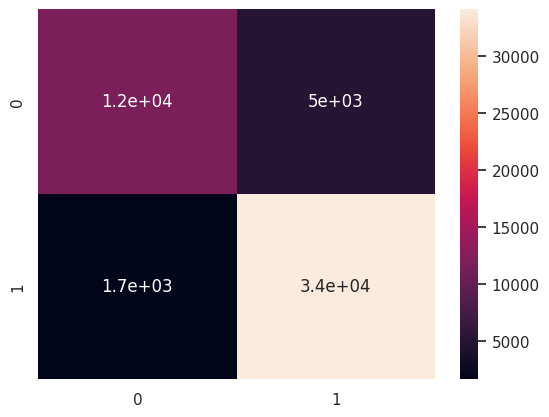

In [ ]:
#displaying the heatmap of the matrix
sns.heatmap(conf_matrix, annot=True)

BUilding a detective system by importing an attack file from the raw dataset, pass it through our model for prediction.

NB: make sure that the features dropped earlier due totheir data types are not included.

In [ ]:
#let us get a list of features used to trai our model
cor_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52603 entries, 49464 to 163781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 52603 non-null  int64  
 1   dur                52603 non-null  float64
 2   proto              52603 non-null  int64  
 3   service            52603 non-null  int64  
 4   spkts              52603 non-null  int64  
 5   dpkts              52603 non-null  int64  
 6   rate               52603 non-null  float64
 7   dttl               52603 non-null  int64  
 8   dload              52603 non-null  float64
 9   dinpkt             52603 non-null  float64
 10  djit               52603 non-null  float64
 11  smean              52603 non-null  int64  
 12  trans_depth        52603 non-null  int64  
 13  response_body_len  52603 non-null  int64  
 14  ct_srv_src         52603 non-null  int64  
 15  is_ftp_login       52603 non-null  int64  
 16  attack_cat       

In [ ]:
cor_X_test.head()

,id,dur,proto,service,spkts,dpkts,rate,dttl,dload,dinpkt,djit,smean,trans_depth,response_body_len,ct_srv_src,is_ftp_login,attack_cat
49464,49465,0.702315,113,0,10,6,21.357939,252,2.551562e+03,122.311398,205.108922,76,0,0,3,0,4
80075,80076,4.322333,113,0,40,164,46.965379,252,3.603739e+05,25.753673,2952.489975,48,0,0,2,0,3
122291,122292,1.030295,113,3,12,12,22.323703,252,4.860744e+03,82.327453,104.249742,48,0,0,2,0,4
7207,7208,0.126070,113,0,92,92,1451.574605,29,5.260634e+06,1.378769,2.099515,57,0,0,6,0,6
155337,155338,0.000003,119,2,2,0,333333.321500,0,0.000000e+00,0.000000,0.000000,57,0,0,33,0,5


In [ ]:
cor_X_test.tail()

,id,dur,proto,service,spkts,dpkts,rate,dttl,dload,dinpkt,djit,smean,trans_depth,response_body_len,ct_srv_src,is_ftp_login,attack_cat
31816,31817,0.067097,113,0,60,62,1803.359295,29,5.869592e+06,1.091672,70.409200,60,0,0,5,0,6
154017,154018,0.000003,119,2,2,0,333333.321500,0,0.000000e+00,0.000000,0.000000,57,0,0,16,0,5
76181,76182,0.541911,113,5,12,26,68.276893,252,4.151973e+05,17.720040,2125.811125,77,1,13824,1,0,3
90767,90768,0.000006,33,0,2,0,166666.660800,0,0.000000e+00,0.000000,0.000000,100,0,0,3,0,1
163781,163782,16.170187,78,0,16,0,0.927633,0,0.000000e+00,0.000000,0.000000,272,0,0,2,0,3


In [ ]:
input_data = (1,0.000006,33,0,2,2,166666.660800,0,0.00000,0.0000,0.000,100,0,0,3,0,1)

# changing the input_data to a numpy_array
input_data_as_nparray = np.asarray(input_data)


In [ ]:
# reshaping  the array as we are predicting for one instance
reshaped_input_data = input_data_as_nparray.reshape(1,-1)

prediction = LR_Model_classifier.predict(reshaped_input_data)
print(prediction)

if (prediction[0] == 0):
  print('This Network traffic is Normal')
else:
  print('This Network trafic is an Attack')

[1]
This Network trafic is an Attack


Saving The Trained Model

This is to assist us build an IDE using Spyder in Anaconda environment.

In [ ]:
# import pickle
import pickle

In [ ]:
Filename = 'attack_model2.sav'
pickle.dump(LR_Model_classifier, open(Filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('attack_model2.sav', 'rb'))

Let us check if truly our model has been saved

In [ ]:
input_data = (90768,0.000006,33,0,2,2,166666.660800,0,0.00000,0.0000,0.000,100,0,0,3,0,1)

# changing the input_data to a numpy_array
input_data_as_nparray = np.asarray(input_data)

# reshaping  the array as we are predicting for one instance
reshaped_input_data = input_data_as_nparray.reshape(1,-1)

prediction = loaded_model.predict(reshaped_input_data)
print(prediction)

if (prediction[0] == 0):
  print('This Network traffic is Normal')
else:
  print('This Network trafic is an Attack')


[1]
This Network trafic is an Attack


NOW LET US PROCEED TO DEVELOPING AN INTRUSION DETECTION SYSTEM, THAT WOULD IDENTIFY IF A NETWORK TRAFFIC IS AN ATTACK OR NORMAL.
THIS WOULD BE DONE USING STREAMLIT API & ANACONDA SPYDER AS IDE.